In [60]:
import cv2
import skvideo.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [61]:
species_list = ['species_fourspot',
 'species_grey sole',
 'species_other',
 'species_plaice',
 'species_summer',
 'species_windowpane',
 'species_winter']

In [143]:
def process_row(row,frame,class_name, display=False, bounding_pad=2):
    x1, x2, y1, y2 = map(int, row[['x1', 'x2', 'y1', 'y2']].as_matrix())
    length = row['length']
    if length < 100:
        delta = 50
    elif length >= 100 and length < 150:
        delta = 75
    elif length >= 150 and length < 200:
        delta = 100
    elif length >= 200 and length < 250:
        delta = 125
    elif length >= 250 and length < 300:
        delta = 150
    elif length >= 300 and length < 350:
        delta = 175
    else:
        delta = int(length//2)
        
    delta += bounding_pad
    mid_x = int(x1 + x2)//2
    mid_y = int(y1 + y2)//2
    max_y, max_x, ch = frame.shape
    start_x = max(0, mid_x-delta)
    start_y = max(0, mid_y-delta)
    end_x = min(mid_x+delta, max_x)
    end_y = min(mid_y+delta, max_y)
    
    image = np.copy(frame)
    cropped_image = np.copy(image)[start_y:end_y,start_x:end_x]
    
    if display:
        image = cv2.rectangle(image, (start_x, start_y), (end_x, end_y), (255,0,0), 5)
        cropped_image = cv2.circle(cropped_image, (x1 - start_x, y1- start_y), 3, (255,0,0))
        figure = plt.figure(figsize = (10,6))
        a = figure.add_subplot(2,2,1)
        plt.imshow(image)
        plt.axis('off')
        a = figure.add_subplot(2,2,2)
        plt.imshow(cropped_image)
        plt.suptitle("Class: {}".format(class_name))
        plt.show()

In [144]:
def process_video(df, video_index,skip=None,display_frames=True):
    videos = df['video_id'].unique()
    base_path = '../data/train_videos/'
    x = df[df['video_id']==videos[video_index]].dropna()
    print("Total Fish in Video: {}".format(x['fish_number'].count()))
    print("skip sample at : {}".format(skip))
    x['species'] = x.apply(lambda row: row[species_list].argmax(), axis=1)
    max_frame = x['frame'].max()
    vid_generator = skvideo.io.FFmpegReader(base_path + videos[video_index] + '.mp4')
    counter = -1
    outer_counter = 0
    for i, row in x.iterrows():
        target_frame = row['frame']
        for f in vid_generator.nextFrame():
            frame = f
            counter +=1
            if counter == target_frame:
                break
        if skip:
            if outer_counter % skip == 0:
                process_row(row,frame,row['species'], display=True, bounding_pad=20)
        else:
            process_row(row,frame,row['species'], display=True, bounding_pad=20)
        outer_counter += 1

Total Fish in Video: 25
skip sample at : 5


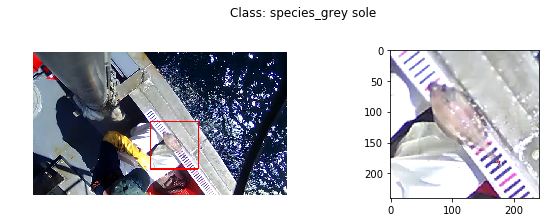

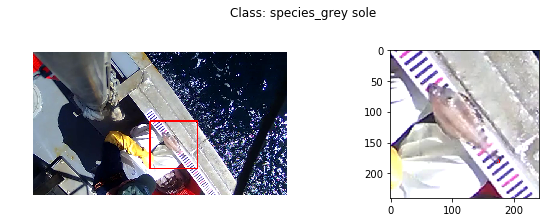

In [ ]:
process_video(df, 0, 5)

Total Fish in Video: 49
skip sample at : 10
226.4972


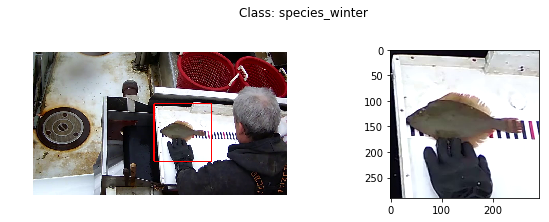

211.6034


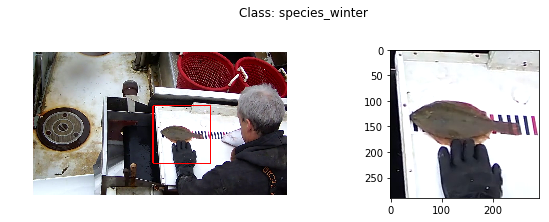

262.42900000000003


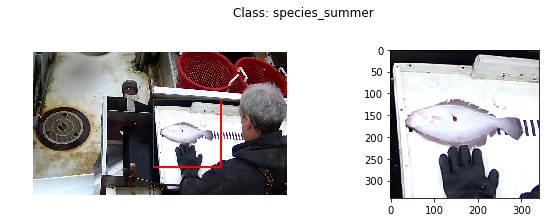

220.1113


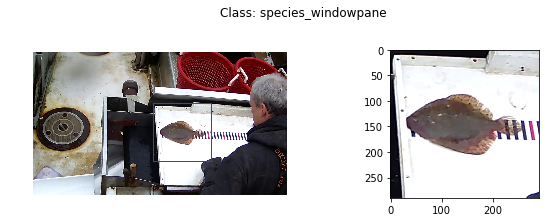

213.8457


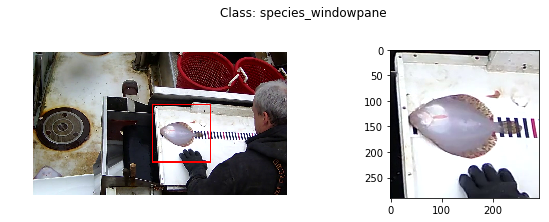

In [141]:
process_video(df, 111, 10)

Total Fish in Video: 56
skip sample at : 10
186.6039


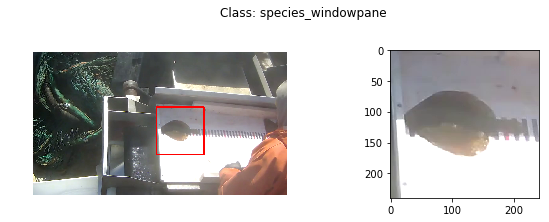

232.3639


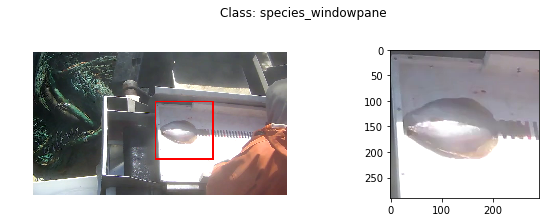

215.671


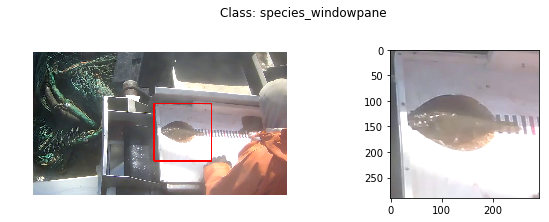

230.0782


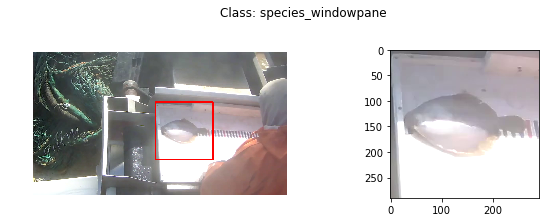

253.2923


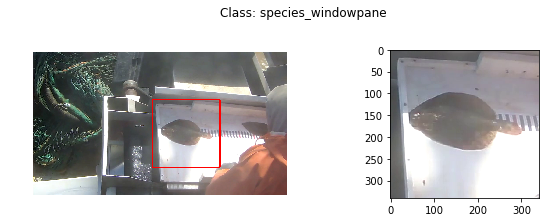

358.0196


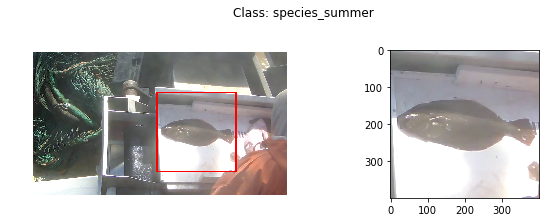

In [142]:
process_video(df, 11, 10)

In [111]:
1//2

0